 Fecha de realización: 17/07/2022
 
* Se ha creado una nueva variable concatenando los tres targets como una sola cadena de texto.

In [1]:
import pycaret
import pandas as pd


In [2]:
#Cargamos el dataset desde nuestro directorio de trabajo
df = pd.read_csv("/media/dsg/TOSHIBA EXT/PhD/DATA/XRF_trainning_100_x_100_duplicado.csv") #directorio de trabajo
#Inspeccionamos el dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260 entries, 0 to 2259
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2260 non-null   int64  
 1   Group       2260 non-null   object 
 2   Subgroup    2260 non-null   object 
 3   Hey's CIM   2260 non-null   object 
 4   target      2260 non-null   object 
 5   Mg          2260 non-null   float64
 6   Al          2260 non-null   float64
 7   Si          2260 non-null   float64
 8   P           2260 non-null   float64
 9   S           2260 non-null   float64
 10  Cl          2260 non-null   float64
 11  K           2260 non-null   float64
 12  Ca          2260 non-null   float64
 13  Sc          2260 non-null   float64
 14  Ti          2260 non-null   float64
 15  V           2260 non-null   float64
 16  Cr          2260 non-null   float64
 17  Mn          2260 non-null   float64
 18  Fe          2260 non-null   float64
 19  Co          2260 non-null  

In [3]:
# Eliminamos columnas innecesarias para nuestro experimiento
df = df.drop(['Unnamed: 0', 'suma', 'Subgroup', "Hey's CIM"], axis=1)
df.isnull().any().any()


False

In [4]:

df = df.drop(['Group '], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260 entries, 0 to 2259
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  2260 non-null   object 
 1   Mg      2260 non-null   float64
 2   Al      2260 non-null   float64
 3   Si      2260 non-null   float64
 4   P       2260 non-null   float64
 5   S       2260 non-null   float64
 6   Cl      2260 non-null   float64
 7   K       2260 non-null   float64
 8   Ca      2260 non-null   float64
 9   Sc      2260 non-null   float64
 10  Ti      2260 non-null   float64
 11  V       2260 non-null   float64
 12  Cr      2260 non-null   float64
 13  Mn      2260 non-null   float64
 14  Fe      2260 non-null   float64
 15  Co      2260 non-null   float64
 16  Ni      2260 non-null   float64
 17  Cu      2260 non-null   float64
 18  Zn      2260 non-null   float64
 19  Ga      2260 non-null   float64
 20  Ge      2260 non-null   float64
 21  As      2260 non-null   float64
 22  

In [5]:
# Distribución en el target_Group
target = df['target'].value_counts()
target

VarisciteVariscitePhosphates of Al alone                  791
MicaDioctahedral micaAluminosilicates of K                448
Pyrophyllite-TalcTalcSilicates of Mg not containing Al    158
ChloriteChloriteAluminosilicates of Fe and Mg             146
ChloritoidMagnesiochloritoid Aluminosilicates of Mg        84
                                                         ... 
ZeolitePhillipsiteAluminosilicates of Ca and alkalis        1
MicaDioctahedral micaOxides of Fe                           1
PalygorskitePalygorskiteAluminosilicates of Mg              1
MurmaniteSoboleviteSilicates with phosphate                 1
Chloritoid Magnesiochloritoid Aluminosilicates of Mg        1
Name: target, Length: 87, dtype: int64

In /home/dsg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dsg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dsg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/dsg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dsg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classi

<AxesSubplot:>

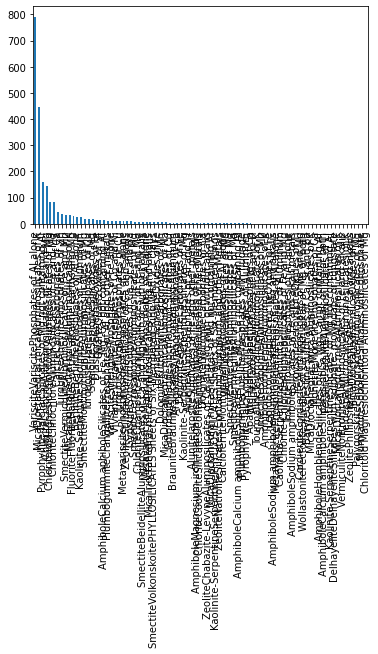

In [6]:
target.plot(kind='bar')

In [7]:
#Eliminación de clases <10 para el target_Group
casos = target[target <10]
values = casos.index
values
deleted_cases= df[df["target"].isin(values)]
case_del = deleted_cases.index
df.drop(case_del, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2103 entries, 1 to 2259
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  2103 non-null   object 
 1   Mg      2103 non-null   float64
 2   Al      2103 non-null   float64
 3   Si      2103 non-null   float64
 4   P       2103 non-null   float64
 5   S       2103 non-null   float64
 6   Cl      2103 non-null   float64
 7   K       2103 non-null   float64
 8   Ca      2103 non-null   float64
 9   Sc      2103 non-null   float64
 10  Ti      2103 non-null   float64
 11  V       2103 non-null   float64
 12  Cr      2103 non-null   float64
 13  Mn      2103 non-null   float64
 14  Fe      2103 non-null   float64
 15  Co      2103 non-null   float64
 16  Ni      2103 non-null   float64
 17  Cu      2103 non-null   float64
 18  Zn      2103 non-null   float64
 19  Ga      2103 non-null   float64
 20  Ge      2103 non-null   float64
 21  As      2103 non-null   float64
 22  

In [9]:
df['target'].nunique()

25

In [10]:
df['target'].value_counts()

VarisciteVariscitePhosphates of Al alone                              791
MicaDioctahedral micaAluminosilicates of K                            448
Pyrophyllite-TalcTalcSilicates of Mg not containing Al                158
ChloriteChloriteAluminosilicates of Fe and Mg                         146
ChloritoidMagnesiochloritoid Aluminosilicates of Mg                    84
ChloriteClinochloreAluminosilicates of Fe and Mg                       82
CalciteCalciteCarbonates of Ca                                         44
TurquoiseAheylitePhosphates of Zn                                      36
SmectiteVermiculiteAluminosilicates of Fe and Mg                       35
MicaTrioctahedral micaAluminosilicates of K                            35
FluoriteFluoriteHalides of the alkaline earths and Mg                  28
BerliniteBerlinitePhosphates of Al alone                               26
Kaolinite-Serpentine KaoliniteSilicates of Aluminum                    25
SmectiteMontmorilloniteAluminosilicate

<AxesSubplot:>

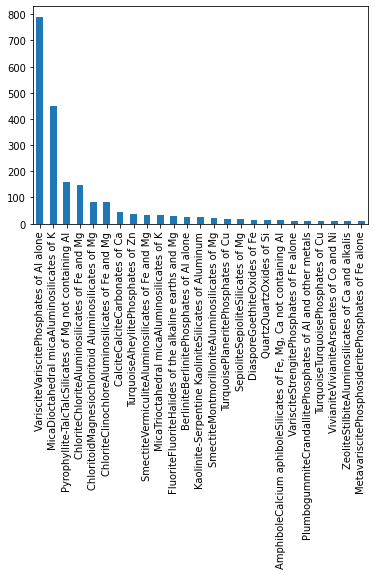

In [11]:
df['target'].value_counts().plot(kind='bar')

In [12]:
# check version number
import imblearn
from imblearn.over_sampling import SMOTE
# Undersample and plot imbalanced dataset with the Condensed Nearest Neighbor Rule

from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours

MicaDioctahedral micaAluminosilicates of K                            210
VarisciteVariscitePhosphates of Al alone                              203
Pyrophyllite-TalcTalcSilicates of Mg not containing Al                158
ChloriteChloriteAluminosilicates of Fe and Mg                         146
ChloritoidMagnesiochloritoid Aluminosilicates of Mg                    84
ChloriteClinochloreAluminosilicates of Fe and Mg                       82
CalciteCalciteCarbonates of Ca                                         44
TurquoiseAheylitePhosphates of Zn                                      36
SmectiteVermiculiteAluminosilicates of Fe and Mg                       35
MicaTrioctahedral micaAluminosilicates of K                            35
FluoriteFluoriteHalides of the alkaline earths and Mg                  28
BerliniteBerlinitePhosphates of Al alone                               26
Kaolinite-Serpentine KaoliniteSilicates of Aluminum                    25
SmectiteMontmorilloniteAluminosilicate

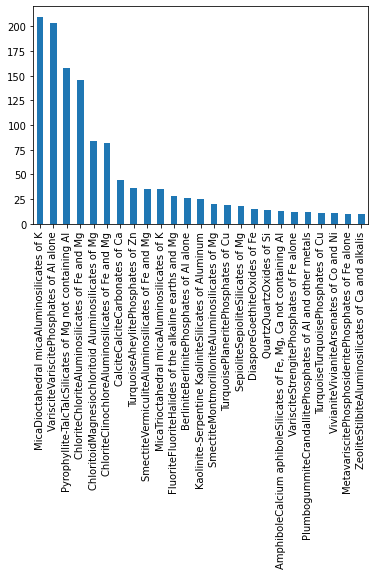

In [13]:
X = df.drop(['target'], axis=1)
y = df['target']
undersample = CondensedNearestNeighbour(sampling_strategy= ['VarisciteVariscitePhosphates of Al alone','MicaDioctahedral micaAluminosilicates of K'], n_neighbors=1, n_seeds_S= 200)
undersample2 = EditedNearestNeighbours(sampling_strategy= ['VarisciteVariscitePhosphates of Al alone','MicaDioctahedral micaAluminosilicates of K'], n_neighbors=5)
X_cnn2, y_cnn2 = undersample.fit_resample(X, y)
y_cnn2.value_counts().plot(kind='bar')
y_cnn2.value_counts()

VarisciteVariscitePhosphates of Al alone                              642
MicaDioctahedral micaAluminosilicates of K                            217
Pyrophyllite-TalcTalcSilicates of Mg not containing Al                158
ChloriteChloriteAluminosilicates of Fe and Mg                         146
ChloritoidMagnesiochloritoid Aluminosilicates of Mg                    84
ChloriteClinochloreAluminosilicates of Fe and Mg                       82
CalciteCalciteCarbonates of Ca                                         44
TurquoiseAheylitePhosphates of Zn                                      36
MicaTrioctahedral micaAluminosilicates of K                            35
SmectiteVermiculiteAluminosilicates of Fe and Mg                       35
FluoriteFluoriteHalides of the alkaline earths and Mg                  28
BerliniteBerlinitePhosphates of Al alone                               26
Kaolinite-Serpentine KaoliniteSilicates of Aluminum                    25
SmectiteMontmorilloniteAluminosilicate

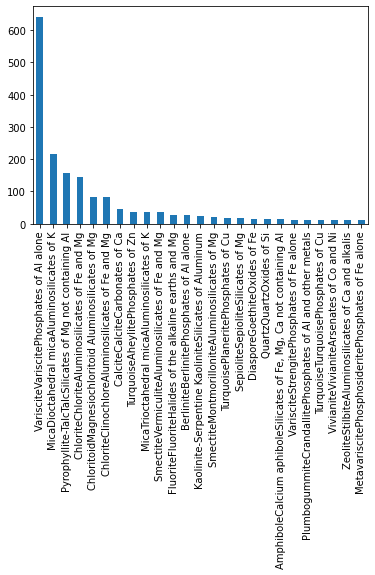

In [14]:
X_cnn3, y_cnn3 = undersample2.fit_resample(X, y)
y_cnn3.value_counts().plot(kind='bar')
y_cnn3.value_counts()

In [15]:
under_data = X_cnn3
under_data['target'] = y_cnn3

In [16]:
X = under_data.drop(['target'], axis=1)
y = under_data['target']

ZeoliteStilbiteAluminosilicates of Ca and alkalis                     642
CalciteCalciteCarbonates of Ca                                        642
MicaTrioctahedral micaAluminosilicates of K                           642
SmectiteMontmorilloniteAluminosilicates of Mg                         642
ChloriteChloriteAluminosilicates of Fe and Mg                         642
SepioliteSepioliteSilicates of Mg                                     642
QuartzQuartzOxides of Si                                              642
TurquoisePlaneritePhosphates of Cu                                    642
PlumbogummiteCrandallitePhosphates of Al and other metals             642
VarisciteVariscitePhosphates of Al alone                              642
FluoriteFluoriteHalides of the alkaline earths and Mg                 642
Kaolinite-Serpentine KaoliniteSilicates of Aluminum                   642
ChloritoidMagnesiochloritoid Aluminosilicates of Mg                   642
TurquoiseTurquoisePhosphates of Cu    

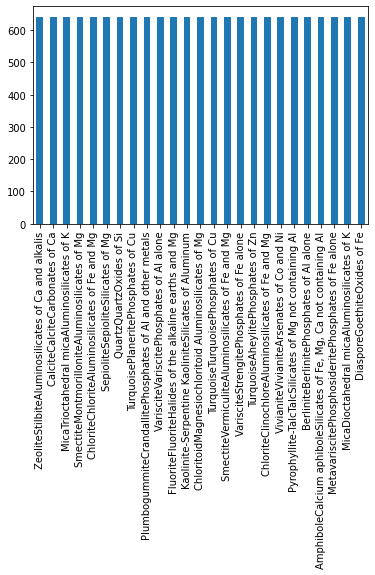

In [17]:

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)


y_smote.value_counts().plot(kind='bar')
y_smote.value_counts()

In [18]:
smote_data = X_smote
smote_data['target'] = y_smote

In [19]:
#Dividimos el dataset en subsets de antrenamiento y validación
#además dejamos una porción de la data sin usar para la evaluación final
data = smote_data.sample(frac=0.90, random_state=786)
data_unseen = smote_data.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data para el modelo: ' + str(data.shape))
print('Data para evaluación: ' + str(data_unseen.shape))

Data para el modelo: (14445, 46)
Data para evaluación: (1605, 46)


In [20]:
from pycaret.classification import *
#realizamos el setup del experimento y decidimos la proporción de data que usaremos para el trainning
experiment = setup(data=data, target= 'target',train_size=0.8, session_id=123)

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,"AmphiboleCalcium aphiboleSilicates of Fe, Mg, Ca not containing Al: 0, BerliniteBerlinitePhosphates of Al alone: 1, CalciteCalciteCarbonates of Ca: 2, ChloriteChloriteAluminosilicates of Fe and Mg: 3, ChloriteClinochloreAluminosilicates of Fe and Mg: 4, ChloritoidMagnesiochloritoid\xa0Aluminosilicates of Mg: 5, DiasporeGoethiteOxides of Fe: 6, FluoriteFluoriteHalides of the alkaline earths and Mg: 7, Kaolinite-Serpentine\xa0KaoliniteSilicates of Aluminum: 8, MetavariscitePhosphosideritePhosphates of Fe alone: 9, MicaDioctahedral micaAluminosilicates of K: 10, MicaTrioctahedral micaAluminosilicates of K: 11, PlumbogummiteCrandallitePhosphates of Al and other metals: 12, Pyrophyllite-TalcTalcSilicates of Mg not containing Al: 13, QuartzQuartzOxides of Si: 14, SepioliteSepioliteSilicates of Mg: 15, SmectiteMontmorilloniteAluminosilicates of Mg: 16, SmectiteVermiculiteAluminosilicates of Fe and Mg: 17, TurquoiseAheylitePhosphates of Zn: 18, TurquoisePlaneritePhosphates of Cu: 19, TurquoiseTurquoisePhosphates of Cu: 20, VarisciteStrengitePhosphates of Fe alone: 21, VarisciteVariscitePhosphates of Al alone: 22, VivianiteVivianiteArsenates of Co and Ni: 23, ZeoliteStilbiteAluminosilicates of Ca and alkalis: 24"
4,Original Data,"(14445, 46)"
5,Missing Values,False
6,Numeric Features,45
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
best = compare_models(exclude = ['lr', 'gbc', 'lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9849,0.9991,0.9850,0.9851,0.9848,0.9842,0.9842,0.8380
rf,Random Forest Classifier,0.9782,0.9991,0.9783,0.9785,0.9781,0.9773,0.9773,2.7670
dt,Decision Tree Classifier,0.9332,0.9652,0.9335,0.9344,0.9332,0.9304,0.9305,0.2600
knn,K Neighbors Classifier,0.9088,0.9897,0.9091,0.9101,0.9081,0.9050,0.9051,0.4950
lda,Linear Discriminant Analysis,0.6378,0.9621,0.6388,0.6483,0.6296,0.6227,0.6239,0.0860
nb,Naive Bayes,0.5853,0.9621,0.5862,0.6285,0.5290,0.5681,0.5744,0.0480
ridge,Ridge Classifier,0.5457,0.0000,0.5462,0.5552,0.4969,0.5267,0.5318,0.0370
svm,SVM - Linear Kernel,0.4716,0.0000,0.4724,0.5014,0.4198,0.4496,0.4617,1.8340
ada,Ada Boost Classifier,0.1902,0.7340,0.1897,0.1057,0.1045,0.1560,0.1907,1.5500
qda,Quadratic Discriminant Analysis,0.1517,0.5626,0.1529,0.3652,0.1096,0.1167,0.1472,0.0600


In [22]:
# best models
et =create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9810,0.9999,0.9810,0.9811,0.9808,0.9802,0.9802
1,0.9836,0.9997,0.9836,0.9838,0.9834,0.9829,0.9829
2,0.9879,0.9987,0.9880,0.9882,0.9878,0.9874,0.9874
3,0.9888,0.9988,0.9890,0.9888,0.9887,0.9883,0.9883
4,0.9836,0.9987,0.9837,0.9839,0.9835,0.9829,0.9829
5,0.9836,0.9993,0.9837,0.9840,0.9835,0.9829,0.9829
6,0.9922,0.9994,0.9922,0.9924,0.9922,0.9919,0.9919
7,0.9784,0.9977,0.9785,0.9790,0.9783,0.9775,0.9775
8,0.9861,0.9999,0.9863,0.9865,0.9862,0.9856,0.9856
9,0.9835,0.9993,0.9837,0.9834,0.9834,0.9829,0.9829


In [23]:
# tunning hiperparameters
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7292,0.9782,0.7307,0.7527,0.7236,0.7180,0.7196
1,0.7171,0.9765,0.7179,0.7398,0.7111,0.7053,0.7067
2,0.7284,0.9747,0.7298,0.7473,0.7208,0.7171,0.7183
3,0.7189,0.9791,0.7203,0.7481,0.7137,0.7072,0.7087
4,0.7145,0.9777,0.7162,0.7412,0.7074,0.7027,0.7044
5,0.7266,0.9787,0.7281,0.7470,0.7196,0.7153,0.7167
6,0.7203,0.9766,0.7215,0.7504,0.7144,0.7087,0.7105
7,0.7004,0.9735,0.7019,0.7193,0.6918,0.6880,0.6894
8,0.6970,0.9758,0.6984,0.7197,0.6892,0.6844,0.6860
9,0.7203,0.9787,0.7211,0.7440,0.7133,0.7087,0.7101


In [24]:

predict_model(tuned_et);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7179,0.9782,0.7158,0.7407,0.7114,0.7061,0.7077


In [25]:
final_et = finalize_model(tuned_et)
predict_model(final_et);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7214,0.9791,0.7183,0.7475,0.7144,0.7097,0.7116


In [26]:
unseen_predictions = predict_model(final_et, data=data_unseen)
unseen_predictions.head()

,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,...,Ta,W,Au,Hg,Tl,Pb,Th,target,Label,Score
0,15.880765,1.408705,61.827729,0.569592,0.433120,2.313859,0.006411,6.792310,0.006411,0.063349,...,0.000641,0.000641,0.000641,0.000641,0.000641,0.000010,0.000641,"AmphiboleCalcium aphiboleSilicates of Fe, Mg, ...","AmphiboleCalcium aphiboleSilicates of Fe, Mg, ...",0.3934
1,0.531642,22.985390,36.196680,32.283143,0.629645,2.175006,1.544287,1.062142,0.005316,0.230796,...,0.000532,0.000532,0.000532,0.000532,0.000532,0.000010,0.000532,BerliniteBerlinitePhosphates of Al alone,BerliniteBerlinitePhosphates of Al alone,0.1793
2,0.706066,21.801104,37.640575,0.080924,0.074218,0.632969,3.736380,1.669414,0.007061,0.536478,...,0.000706,0.000706,0.000706,0.000706,0.000706,0.000085,0.000706,BerliniteBerlinitePhosphates of Al alone,ChloritoidMagnesiochloritoid Aluminosilicates ...,0.1312
3,0.739604,13.542685,23.191725,2.723072,16.203001,2.888732,2.281729,2.114841,0.007396,17.940112,...,0.000740,0.000740,0.000740,0.000740,0.000740,0.000010,0.000740,CalciteCalciteCarbonates of Ca,ZeoliteStilbiteAluminosilicates of Ca and alkalis,0.0762
4,0.613309,4.996804,2.721184,0.337009,0.354288,1.225926,0.006133,89.214618,0.006133,0.059579,...,0.000613,0.000613,0.000613,0.000613,0.000613,0.000010,0.000613,CalciteCalciteCarbonates of Ca,FluoriteFluoriteHalides of the alkaline earths...,0.5532


In [27]:
#unseen_predictions.to_csv("/media/dsg/TOSHIBA EXT/PhD/DATA/pycaret_exp5/unseen_predicitons.csv")


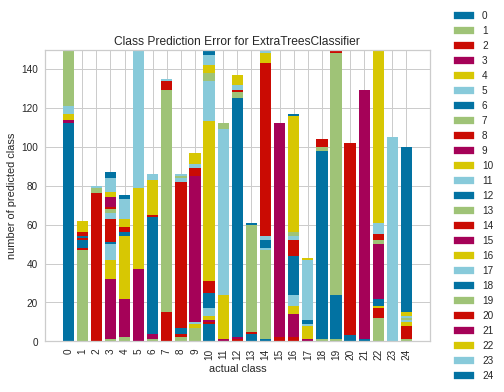

In [28]:
plot_model(final_et, plot = 'error')

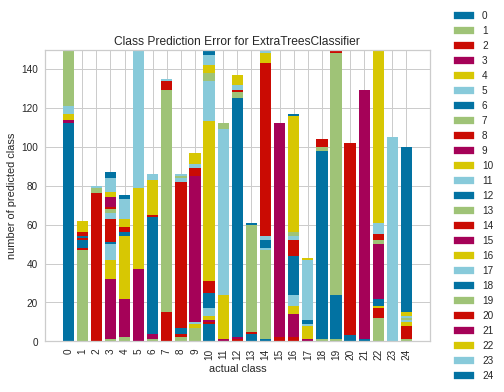

In [29]:

plot_model(final_et, plot = 'error')

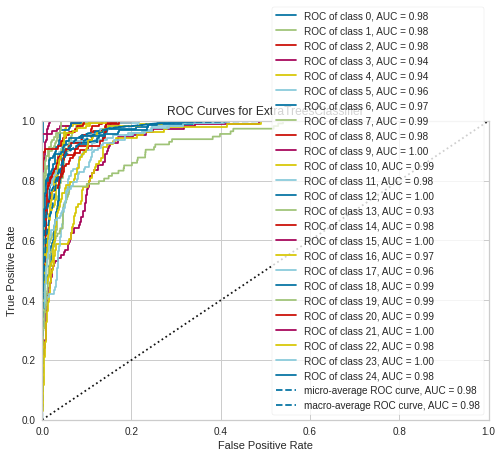

In [30]:
plot_model(final_et, plot = 'auc', scale=1)

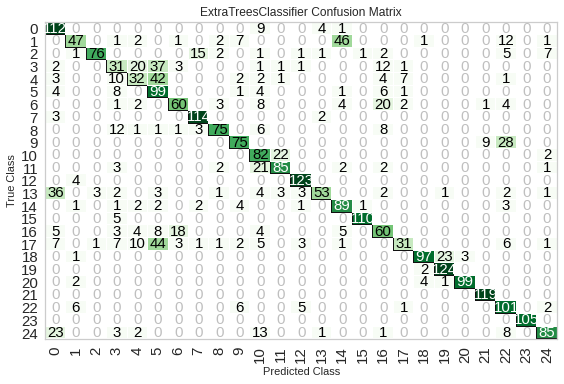

In [31]:
plot_model(final_et, plot = 'confusion_matrix')

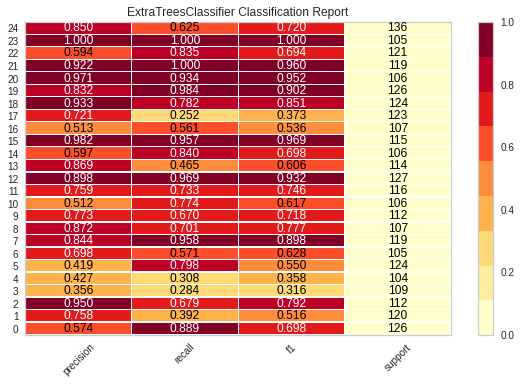

In [32]:
plot_model(final_et, plot = 'class_report')

In [35]:
save_model(final_et, model_name = 'deployment_23072022')



Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight={}, criterion='entropy',
                                       max_depth=5, max_features=1.0,
                                       max_leaf_nodes=No

Package                           Version
--------------------------------- -------------------
alabaster                         0.7.8
alembic                           1.4.1
altair                            4.1.0
appdirs                           1.4.4
apturl                            0.5.2
argon2-cffi                       20.1.0
asgiref                           3.2.7
asn1crypto                        0.24.0
astroid                           1.6.0
async-generator                   1.10
attrs                             20.3.0
Automat                           20.2.0
autopep8                          1.5.5
Babel                             2.4.0
backcall                          0.2.0
backports.entry-points-selectable 1.1.0
backports.zoneinfo                0.2.1
beautifulsoup4                    4.9.3
bleach                            3.2.1
blinker                           1.4
blis                              0.7.4
Boruta                            0.3
Brlapi                   